#### Task!
The task is to create a classifier for cancer diagnose (malignant or benign)



#### Goal 
To get familar with (installation and usage) Jupyter notebook and machine learning library Sklearn (https://scikit-learn.org/stable/) by applying four different classification algorithms (KNN, Logistic Regression, SVM, Decision Tree) on the same task.  Additionally, you also call functions for data scaling, regularization, and kernel function.
#### Dataset
Breast Cancer Wisconsin (Diagnostic) Database.
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

## Get the data

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
#print the predicton labels (target names)
list(cancer.target_names)

['malignant', 'benign']

In [3]:
# Organize our data
label_names = cancer['target_names']
labels = cancer['target']
feature_names = cancer['feature_names']
features = cancer['data']

In [4]:
# see the data
print (label_names) 
print (len(labels))
print (len(feature_names))
print (len(features))

['malignant' 'benign']
569
30
569


## Discover the data to gain insights

#### Task-1: output the number of features the breast cancer dataset has.

In [6]:
print(len(feature_names))

30


#### Task-2: output the size of the data set (how many instances/sample)

In [7]:
print(len(labels))

569


#### Task-3: output the number of instances of malignant and the number of instances of benign.

In [8]:
instance_dic={}
for i in label_names:
    instance_dic[i]=0
print(instance_dic)

for i in labels:
    instance_dic[label_names[i]]+=1
    
print(instance_dic)

{'malignant': 0, 'benign': 0}
{'malignant': 212, 'benign': 357}


## Tiny practice to prepare training and test data for algorithms

Below we will split dataset into training dataset (x) and testing dataset (y)

#### import train_test_split from sklearn

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#### Split our data with traing data test_size=0.3

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

#### Question（no coding need）: Is above split of training/testing is random? How to make the training and test data fixed, so you can reproduce your results?

answer: I understand that the train_test_split method splits a dataset into random train and test subsets. Although,we can get same splits using an optional argument *random_state = int*


For example: X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3 , random_state=7)


Note- The int value assigned to random_state should be fixed and not be changed to get same split in dataset everytime.

Okay, we just finish some warming excercises, in the following, we will train four different classifier and use them to do cancer prediction respectively.

## General Learning Process
#### 1. load the data and prepare the data
#### 2. Implement an algorithm
#### 3. Train the algorithm, verify accuracy, and optimize.
#### 4. Predict on test data.
#### 5. Output the prediction performance

Note that in this assigment, you are not requied to implment the classifiction algorithms, which are already implemented in backend in sklearn library, you just call the function to run the required task. It is your responsibility to explore which function can be used and should be used to implement the TASKS below.  Furthermore, feel free to explore new functions though not mandatory. 

## Algorithm1: KNN

#### okay, now let's asume we start from scratch to use KNN for this classification task. 
#### Task-4: load cancer data as you did in above warming excercise

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#### Task-5: split data into training data and test data, keep training/test size as default, but specify a fixed value for random_state yourself. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3 , random_state=7)

## Select an algorithm
#### Train KNN model using KNeighborsClassifier in sklearn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### We predict cancer on the test data using the trained KNN and output the prediction results

In [14]:
prediction = knn.predict(X_test)
print (prediction)

[1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0]


#### we output the accuracies of the trained KNN model on training data and test data respectively.

In [15]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9447236180904522
0.9473684210526315


#### Task-6: round down the floats to two decimals?

In [16]:
print(round(knn.score(X_train, y_train), 2))
print(round(knn.score(X_test, y_test),2))

0.94
0.95


#### Next, we are going to do some optimization, to explore the best N value.

####  Task-7: print out the value of N in your above trianed KNN?

In [17]:
print(knn.n_neighbors)

5


####  Task-8: try different N (e.g., [1,10]), and print out the accuracy when N is applied with different values.

In [18]:
for N in range(1, 10+1):
    print("For value of N = ",N)
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)
    print("Train accuracy =", round(knn.score(X_train, y_train), 2))
    print("Test accuracy  =", round(knn.score(X_test, y_test),2))
    print("==============================")

For value of N =  1
Train accuracy = 1.0
Test accuracy  = 0.92
For value of N =  2
Train accuracy = 0.97
Test accuracy  = 0.89
For value of N =  3
Train accuracy = 0.96
Test accuracy  = 0.92
For value of N =  4
Train accuracy = 0.95
Test accuracy  = 0.91
For value of N =  5
Train accuracy = 0.94
Test accuracy  = 0.95
For value of N =  6
Train accuracy = 0.94
Test accuracy  = 0.95
For value of N =  7
Train accuracy = 0.94
Test accuracy  = 0.95
For value of N =  8
Train accuracy = 0.94
Test accuracy  = 0.95
For value of N =  9
Train accuracy = 0.93
Test accuracy  = 0.96
For value of N =  10
Train accuracy = 0.94
Test accuracy  = 0.95


## Algorithm2: Logistic Regression

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

####  Task-9: Split the data into training data and test data as you did above, this time try to not copy but write the code yourself

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3 , random_state=7)

##I took same value of random_state as before so as to get Logistic regression accuracy for same test cases and test cases

####  Task-10: Train logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
#training

log_reg = LogisticRegression(max_iter = 2800)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Below we predict cancer on the test data using the trained logistic regression model

In [22]:
prediction = log_reg.predict(X_test)

####  Task-11: print out the accuracies of the trained  logistic regression model on training data and test data respectively.

In [23]:
print("Train accuracy =", round(log_reg.score(X_train, y_train), 2))
print("Test accuracy  =", round(log_reg.score(X_test, y_test),2))

Train accuracy = 0.96
Test accuracy  = 0.96


#### Optimization
#### Regularization

#### Task-12: Train a logistic regression model by modifying the regularization parameter C to different values (e.g., 100), 

In [24]:
log_regs={}
list_of_c = [1,10,50,100,1000,1500]
for c in list_of_c:
    print("Training for value of C = ",c)
    log_reg = LogisticRegression(C=c , max_iter = 10000)
    log_reg.fit(X_train, y_train)
    log_regs[c]=log_reg

Training for value of C =  1
Training for value of C =  10
Training for value of C =  50
Training for value of C =  100
Training for value of C =  1000
Training for value of C =  1500


#### Task-13: print the corresponding training and testing accuracy to see the differences

In [25]:
for c in log_regs:
    log_reg=log_regs[c]
    print("Value of C = ",c)
    print("Train accuracy =", round(log_reg.score(X_train, y_train), 2))
    print("Test accuracy  =", round(log_reg.score(X_test, y_test),2))
    print("==============================")

Value of C =  1
Train accuracy = 0.96
Test accuracy  = 0.96
Value of C =  10
Train accuracy = 0.97
Test accuracy  = 0.95
Value of C =  50
Train accuracy = 0.98
Test accuracy  = 0.97
Value of C =  100
Train accuracy = 0.98
Test accuracy  = 0.97
Value of C =  1000
Train accuracy = 0.99
Test accuracy  = 0.96
Value of C =  1500
Train accuracy = 0.99
Test accuracy  = 0.96


#### Task-14: Lower the regularization parameter C as 0.01, and print out the corresponding training and testing accuracy.

In [26]:
c= 0.01
log_reg = LogisticRegression(C = c , max_iter = 10000)
log_reg.fit(X_train, y_train)
print("Train accuracy =", round(log_reg.score(X_train, y_train), 2))
print("Test accuracy  =", round(log_reg.score(X_test, y_test),2))

Train accuracy = 0.95
Test accuracy  = 0.96


## Algorithm3: SVM

#### We are loading data and splitting data into training data and test data 

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


from sklearn.preprocessing import MinMaxScaler
X, y = load_breast_cancer(return_X_y=True)
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

####  Task-15:  train a SVM model using SVC model in sklearn

In [28]:
import numpy as np
from sklearn.svm import SVC 

#codes to train a SVM model
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### We predict cancer on the test data using the trained SVM model

In [29]:
prediction = svm.predict(X_test)

####  Task-16: output the accuracy of the training and prediction respectively.

In [30]:
print("Train accuracy =", round(svm.score(X_train, y_train), 2))
print("Test accuracy  =", round(svm.score(X_test, y_test),2))

Train accuracy = 0.98
Test accuracy  = 0.97


#### Optimization by using kernel function
#### Task-17: print the name of the default kernel function in above model.

In [31]:
print(svm.kernel)

rbf


#### Okay, now we will have a little bit harder nut to crack :-) 
#### Task-18:  implement two kernel functions (linear and Gaussian) on your own and test the different results.

In [32]:
# kernel=linear
def my_kernel_linear(xi,xj):
    
    # write a linear kernel function here
    l = np.dot(xi,np.transpose(xj))
    return l

In [33]:
# kernel=Gaussian = RBF
def my_kernel_gaussian(xi,xj):
    
     # write a gaussian kernel function
    K = np.zeros((xi.shape[0],xj.shape[0]))
    for i,x in enumerate(xi):
        for j,y in enumerate(xj):
            K[i,j] = np.exp(-1*np.linalg.norm(x-y)**2)
    return K

#### We are replacing replace the default kernel function with your kernel.  

In [34]:
svm_linear_kernel = SVC(kernel=my_kernel_linear)
svm_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function my_kernel_linear at 0x00000232600D8828>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

####  Task-19: print out the accuracy  of SVM models with kernel function my_kernel_linear.

In [35]:
print("Train accuracy =", round(svm_linear_kernel.score(X_train, y_train), 2))
print("Test accuracy  =", round(svm_linear_kernel.score(X_test, y_test),2))

Train accuracy = 0.98
Test accuracy  = 0.96


#### Below, we replace the default kernel function with the gaussian kernel you wrote.  

In [36]:
svm_gaussian_kernel = SVC(kernel=my_kernel_gaussian)
svm_gaussian_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function my_kernel_gaussian at 0x00000232600D8708>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

#### Task-20: print out the accuracy of SVM models with kernel function my_kernel_gaussian

In [37]:
print("Train accuracy =", round(svm_gaussian_kernel.score(X_train, y_train), 2))
print("Test accuracy  =", round(svm_gaussian_kernel.score(X_test, y_test),2))

Train accuracy = 0.98
Test accuracy  = 0.97


## Algorithm4:  Decision Tree

#### Okay, after above repetitive practices.  I would let you complete the whole training and testing process by yourself for decision tree. 

####  Task-21: get data, split into traing data and test data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3 , random_state=7)

####  Task-22: train a Decision Tree model using DecisionTreeClassifier in sklearn

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Task-23: predict cancer on the test data using the trained Decision Tree model

In [40]:
prediction = DTC.predict(X_test)

####  Task-24: output the accuracies of the trained  logistic regression model on training data and test data respectively.

In [41]:
print("Train accuracy =", round(DTC.score(X_train, y_train), 2))
print("Test accuracy  =", round(DTC.score(X_test, y_test),2) )

Train accuracy = 1.0
Test accuracy  = 0.93


#### Task-25: output the feature importances in this decision tree.

In [42]:
feature_importances = DTC.feature_importances_
for i,v in enumerate(feature_importances):
    print('Feauture: ', i ,', Score: ',round(v,5))

Feauture:  0 , Score:  0.0
Feauture:  1 , Score:  0.05073
Feauture:  2 , Score:  0.0
Feauture:  3 , Score:  0.0
Feauture:  4 , Score:  0.0
Feauture:  5 , Score:  0.0
Feauture:  6 , Score:  0.0
Feauture:  7 , Score:  0.07526
Feauture:  8 , Score:  0.0
Feauture:  9 , Score:  0.00161
Feauture:  10 , Score:  0.0
Feauture:  11 , Score:  0.00877
Feauture:  12 , Score:  0.01028
Feauture:  13 , Score:  0.0
Feauture:  14 , Score:  0.0
Feauture:  15 , Score:  0.0
Feauture:  16 , Score:  0.0
Feauture:  17 , Score:  0.03004
Feauture:  18 , Score:  0.0
Feauture:  19 , Score:  0.01044
Feauture:  20 , Score:  0.0
Feauture:  21 , Score:  0.02625
Feauture:  22 , Score:  0.71418
Feauture:  23 , Score:  0.00526
Feauture:  24 , Score:  0.00493
Feauture:  25 , Score:  0.0
Feauture:  26 , Score:  0.01029
Feauture:  27 , Score:  0.05195
Feauture:  28 , Score:  0.0
Feauture:  29 , Score:  0.0


#### External NON-mandatory task (only if you have time and/or interest): using matplotlib.pyplot to visualize feature importance value

In [43]:
import matplotlib.pyplot as plt

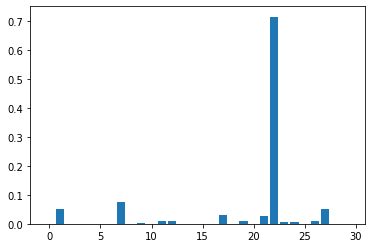

In [44]:
plt.bar([x for x in range(len(feature_importances))] , feature_importances)
plt.show()

#### Congratualtions if you run through above!  
#### If you are already familar with the training process using Sklearn, feel free to try other settings to improve the accuracy.
 